In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
starbucks = yf.download('SBUX', start='2019-01-01', end='2025-11-20')
starbucks.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SBUX,SBUX,SBUX,SBUX,SBUX
Date,,,,,
2019-01-02,55.271290,55.314258,54.317447,54.721327,10094000
2019-01-03,52.873802,54.755710,52.762093,54.532285,14390100
2019-01-04,54.626808,55.211144,53.346427,53.621408,12694400
2019-01-07,54.626808,55.202549,53.913576,54.437757,10337600
2019-01-08,54.669762,55.245506,54.179951,54.944743,10809700


In [ ]:
starbucks.dropna()

Price,Close,High,Low,Open,Volume
Ticker,SBUX,SBUX,SBUX,SBUX,SBUX
Date,,,,,
2019-01-02,55.271290,55.314258,54.317447,54.721327,10094000
2019-01-03,52.873802,54.755710,52.762093,54.532285,14390100
2019-01-04,54.626808,55.211144,53.346427,53.621408,12694400
2019-01-07,54.626808,55.202549,53.913576,54.437757,10337600
2019-01-08,54.669762,55.245506,54.179951,54.944743,10809700
...,...,...,...,...,...
2025-11-13,85.820007,86.663909,85.571800,86.137712,10507700
2025-11-14,84.779999,86.500000,84.000000,85.610001,13434600


In [ ]:
starbucks = starbucks[(zscore(starbucks['Close']) < 3)]
starbucks.describe()

Price,Close,High,Low,Open,Volume
Ticker,SBUX,SBUX,SBUX,SBUX,SBUX
count,1732.000000,1732.000000,1732.000000,1732.000000,1.732000e+03
mean,85.086849,85.947812,84.189550,85.079245,8.565262e+06
std,12.915758,12.926802,12.902005,12.903199,5.884033e+06
min,49.544113,50.520390,43.994257,48.858075,1.847800e+06
25%,75.477440,76.060260,74.627822,75.494637,5.640125e+06
50%,86.461769,87.314040,85.736655,86.631666,7.286950e+06
75%,94.693592,95.733011,93.860715,94.851424,9.807250e+06
max,113.565300,115.043209,112.439198,113.652428,1.572155e+08


## Exploratory Data Analysis

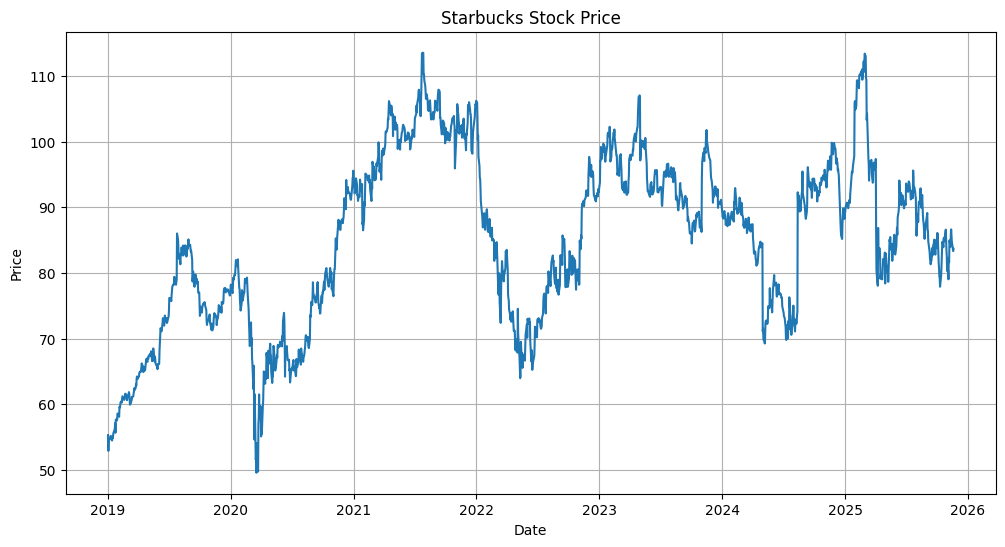

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(starbucks['Close'])
plt.title('Starbucks Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

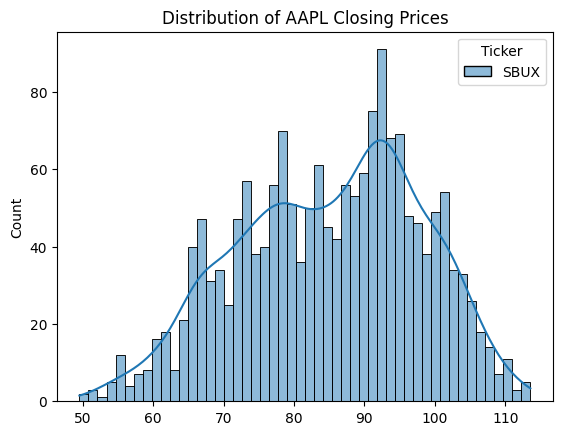

In [ ]:
sns.histplot(starbucks['Close'], bins=50, kde=True)
plt.title('Distribution of AAPL Closing Prices')
plt.show()

## OLS Regression

In [ ]:
X = starbucks['Open']
y = starbucks['Close']
X = sm.add_constant(X)
starbucks_model = sm.OLS(y, X).fit()
print(starbucks_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   SBUX   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.947e+05
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:57:22   Log-Likelihood:                -2790.2
No. Observations:                1732   AIC:                             5584.
Df Residuals:                    1730   BIC:                             5595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3006      0.194      1.547      0.1

## Time Series Analysis

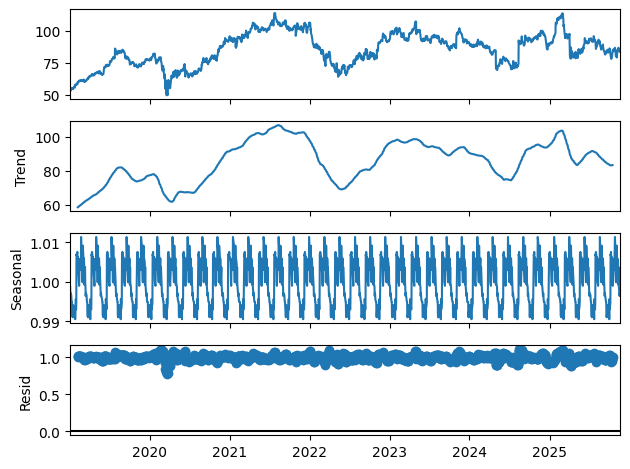

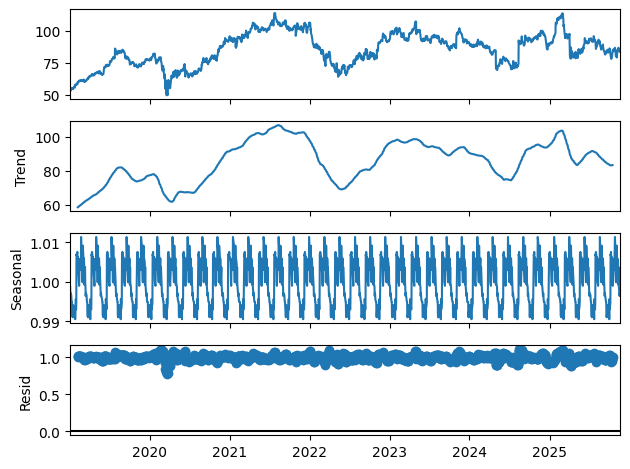

In [ ]:
starbucks_result = seasonal_decompose(starbucks['Close'], model='multiplicative', period=48)
starbucks_result.plot()

## Random Forest Regressor

In [ ]:
X = starbucks.drop('Close', axis=1)
y = starbucks['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
starbucksrandom = RandomForestRegressor(n_estimators=100, random_state=42)
starbucksrandom.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = starbucksrandom.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.37468936478518605
R2 score: 0.9977475641261271


## Decision Tree Regressor

In [ ]:
starbucksdecision = DecisionTreeRegressor(random_state=42)
starbucksdecision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = starbucksdecision.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.8075196220702558
R2 score: 0.9951456157111634


## AdaBoost Regressor

In [ ]:
starbucksada = AdaBoostRegressor(random_state=42)
starbucksada.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
y_pred = starbucksada.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.9238707241741215
R2 score: 0.9944461739309207


## Gradient Boost Regressor

In [ ]:
starbucksgradient = GradientBoostingRegressor(random_state=42)
starbucksgradient.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = starbucksgradient.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.48721984306540056
R2 score: 0.9970710899317561


##XGBoost Regressor

In [ ]:
starbucksxgb = xgb.XGBRegressor(random_state=42)
starbucksxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = starbucksxgb.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.5013148784637451
R2 score: 0.9969863295555115


## Algorithmic Trading Strategy

In [ ]:
starbucks['Short_MA'] = starbucks['Close'].rolling(window=20).mean()
starbucks['Long_MA'] = starbucks['Close'].rolling(window=50).mean()

In [ ]:
starbucks['Buy_Signal'] = np.where(starbucks['Short_MA'] > starbucks['Long_MA'], 1, 0)
starbucks['Sell_Signal'] = np.where(starbucks['Short_MA'] < starbucks['Long_MA'], -1,0)

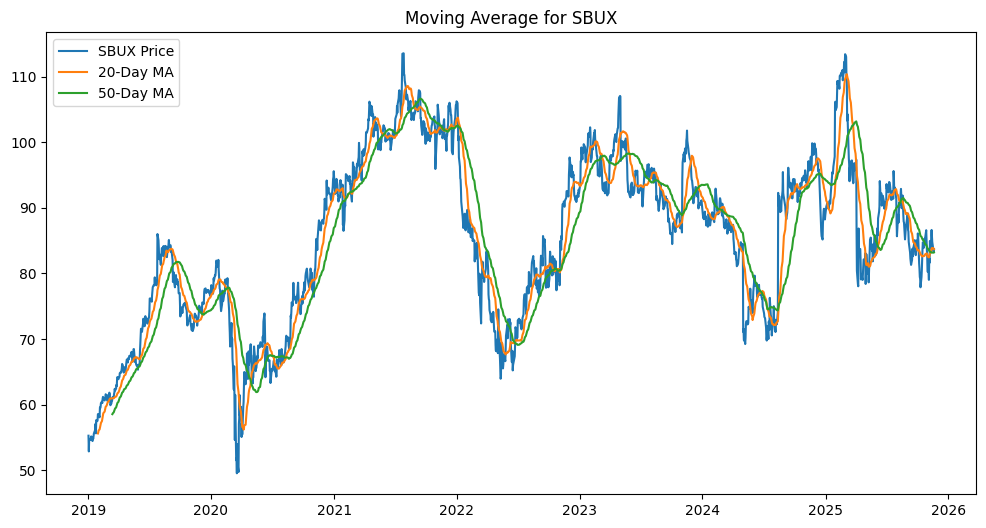

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(starbucks['Close'], label='SBUX Price')
plt.plot(starbucks['Short_MA'], label='20-Day MA')
plt.plot(starbucks['Long_MA'], label='50-Day MA')
plt.legend(loc='upper left')
plt.title('Moving Average for SBUX')
plt.show()